In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('banana_quality.csv', encoding='cp1251', sep=',')

In [3]:
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [4]:
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [5]:
print("Уникальные значения :", data['Quality'].unique())

Уникальные значения : ['Good' 'Bad']


In [6]:
value = {'Good': 1, 'Bad': 0}

data['Quality'] = data['Quality'].map(value)

In [7]:
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


<Axes: >

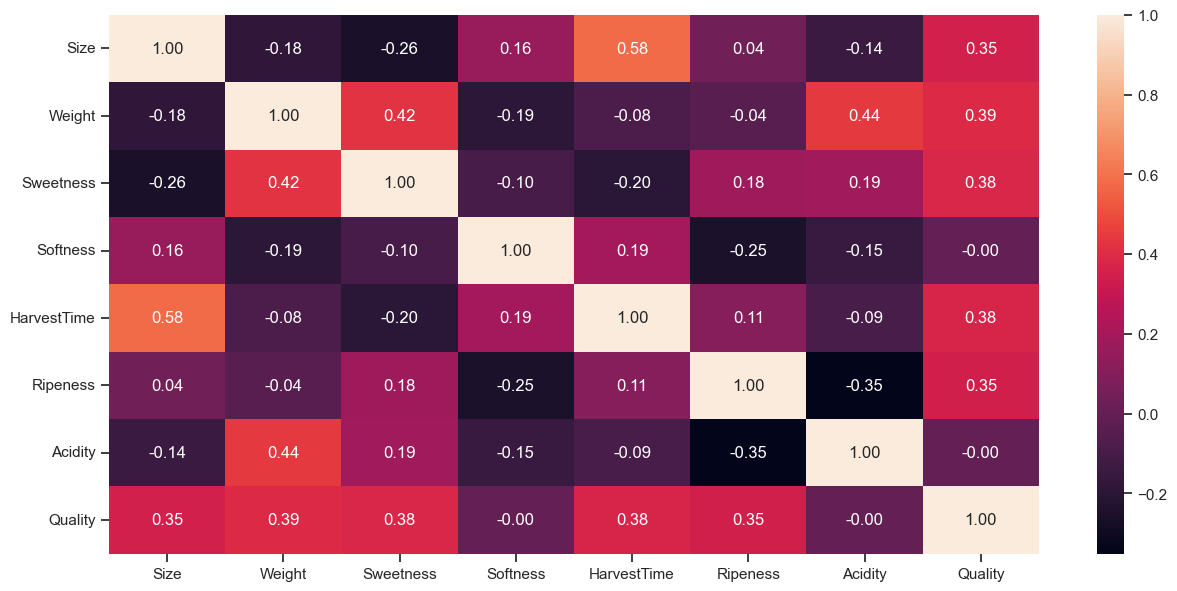

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
print('Признаки, имеющие максимальную по модулю корреляцию с целевым признаком')
best_params = data.corr()['Quality'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.2]
best_params

Признаки, имеющие максимальную по модулю корреляцию с целевым признаком


Weight         0.388789
Sweetness      0.377220
HarvestTime    0.376600
Size           0.352983
Ripeness       0.350503
Name: Quality, dtype: float64

In [10]:
data_best = data[best_params.index]
data_best.head()

,Weight,Sweetness,HarvestTime,Size,Ripeness
0,0.468078,3.077832,0.294799,-1.924968,2.435570
1,0.486870,0.346921,-0.892213,-2.409751,2.067549
2,1.483176,1.568452,-0.647267,-0.357607,3.090643
3,1.566201,1.889605,-1.006278,-0.868524,1.873001
4,1.319199,-0.022459,-1.430692,0.651825,1.078345


In [11]:
y = data['Quality']
X = data_best
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=21)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=21)

# Логистическая регрессия

In [12]:
clf = LogisticRegression()
clf.fit(x_train, y_train);

In [13]:
pred_y_test = clf.predict(x_test)
pred_y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [14]:
pred_y_test_proba = clf.predict_proba(x_test)
pred_y_test_proba[:10]

array([[9.96952853e-01, 3.04714705e-03],
       [9.98754153e-01, 1.24584723e-03],
       [9.23857926e-01, 7.61420737e-02],
       [3.13080286e-01, 6.86919714e-01],
       [2.34942367e-01, 7.65057633e-01],
       [2.36124479e-03, 9.97638755e-01],
       [2.22687430e-01, 7.77312570e-01],
       [2.10601644e-01, 7.89398356e-01],
       [9.02261824e-04, 9.99097738e-01],
       [9.81311369e-01, 1.86886307e-02]])

In [15]:
[round(x, 4) for x in pred_y_test_proba[:10,0]]

[0.997, 0.9988, 0.9239, 0.3131, 0.2349, 0.0024, 0.2227, 0.2106, 0.0009, 0.9813]

In [16]:
[round(x, 4) for x in pred_y_test_proba[:10,1]]

[0.003, 0.0012, 0.0761, 0.6869, 0.7651, 0.9976, 0.7773, 0.7894, 0.9991, 0.0187]

In [17]:
pred_y_test_proba[:10,0] + pred_y_test_proba[:10,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
accuracy_score(y_test, pred_y_test)

0.865

In [19]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [20]:
clf = LogisticRegression()
clf.fit(x_train, y_train);

In [21]:
clf.score(x_test, y_test)

0.865

In [22]:
def print_metrics(y_test, y_pred):
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"F1-measure: {f1_score(y_test, y_pred)}")

In [23]:
y_pred_log = clf.predict(x_test)
print_metrics(y_test, y_pred_log)

Precision: 0.840625
F1-measure: 0.8691437802907916


# SWM

In [24]:
def print_metrics(y_test, y_pred):
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"F1-measure: {f1_score(y_test, y_pred)}")

In [25]:
best_svm_model = SVC()
best_svm_model.fit(x_train, y_train)
y_pred_svm = best_svm_model.predict(x_test)
print_metrics(y_test, y_pred_svm)

Precision: 0.8806451612903226
F1-measure: 0.896551724137931


# Дерево решений

In [26]:
params = {'min_samples_leaf': range(3, 30)}
tree = DecisionTreeClassifier(random_state=3) #max_depth=5
grid_cv = GridSearchCV(estimator=tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(x_train, y_train)
#tree.fit(x_train, y_train)
print(grid_cv.best_params_)

{'min_samples_leaf': 3}


In [27]:
best_tree = grid_cv.best_estimator_
best_tree.fit(x_train, y_train)
y_pred_tree = best_tree.predict(x_test)
print_metrics(y_test, y_pred_tree)

Precision: 0.8548387096774194
F1-measure: 0.8702791461412152


In [28]:
importances = pd.DataFrame(data=zip(x_train.columns, best_tree.feature_importances_), columns=['Признак', 'Важность'])
print('Важность признаков в дереве решений\n')
for row in importances.sort_values(by='Важность', ascending=False).values:
    print(f'{row[0]}: {round(row[1], 3)}')

Важность признаков в дереве решений

Size: 0.266
Sweetness: 0.227
Ripeness: 0.205
Weight: 0.184
HarvestTime: 0.117


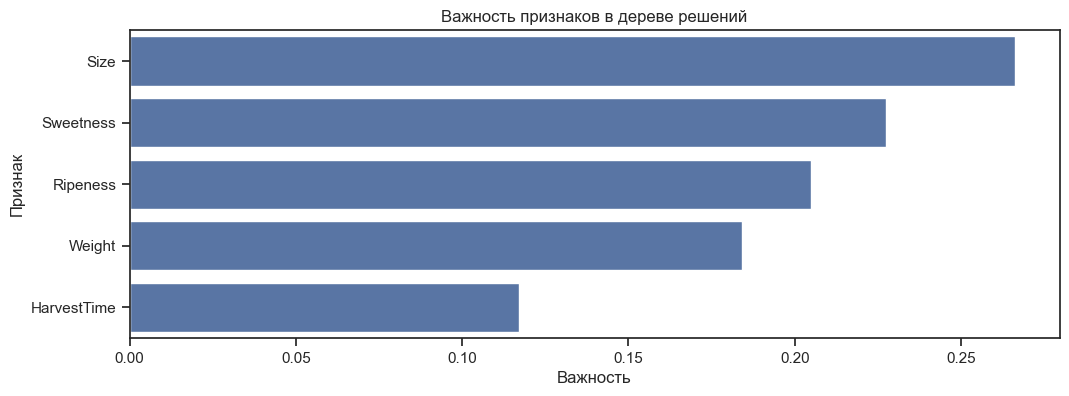

In [29]:
plt.figure(figsize=(12, 4))
sns.barplot(data=importances.sort_values(by='Важность', ascending=False), y='Признак', x='Важность', orient='h', )
plt.title('Важность признаков в дереве решений')
plt.show()

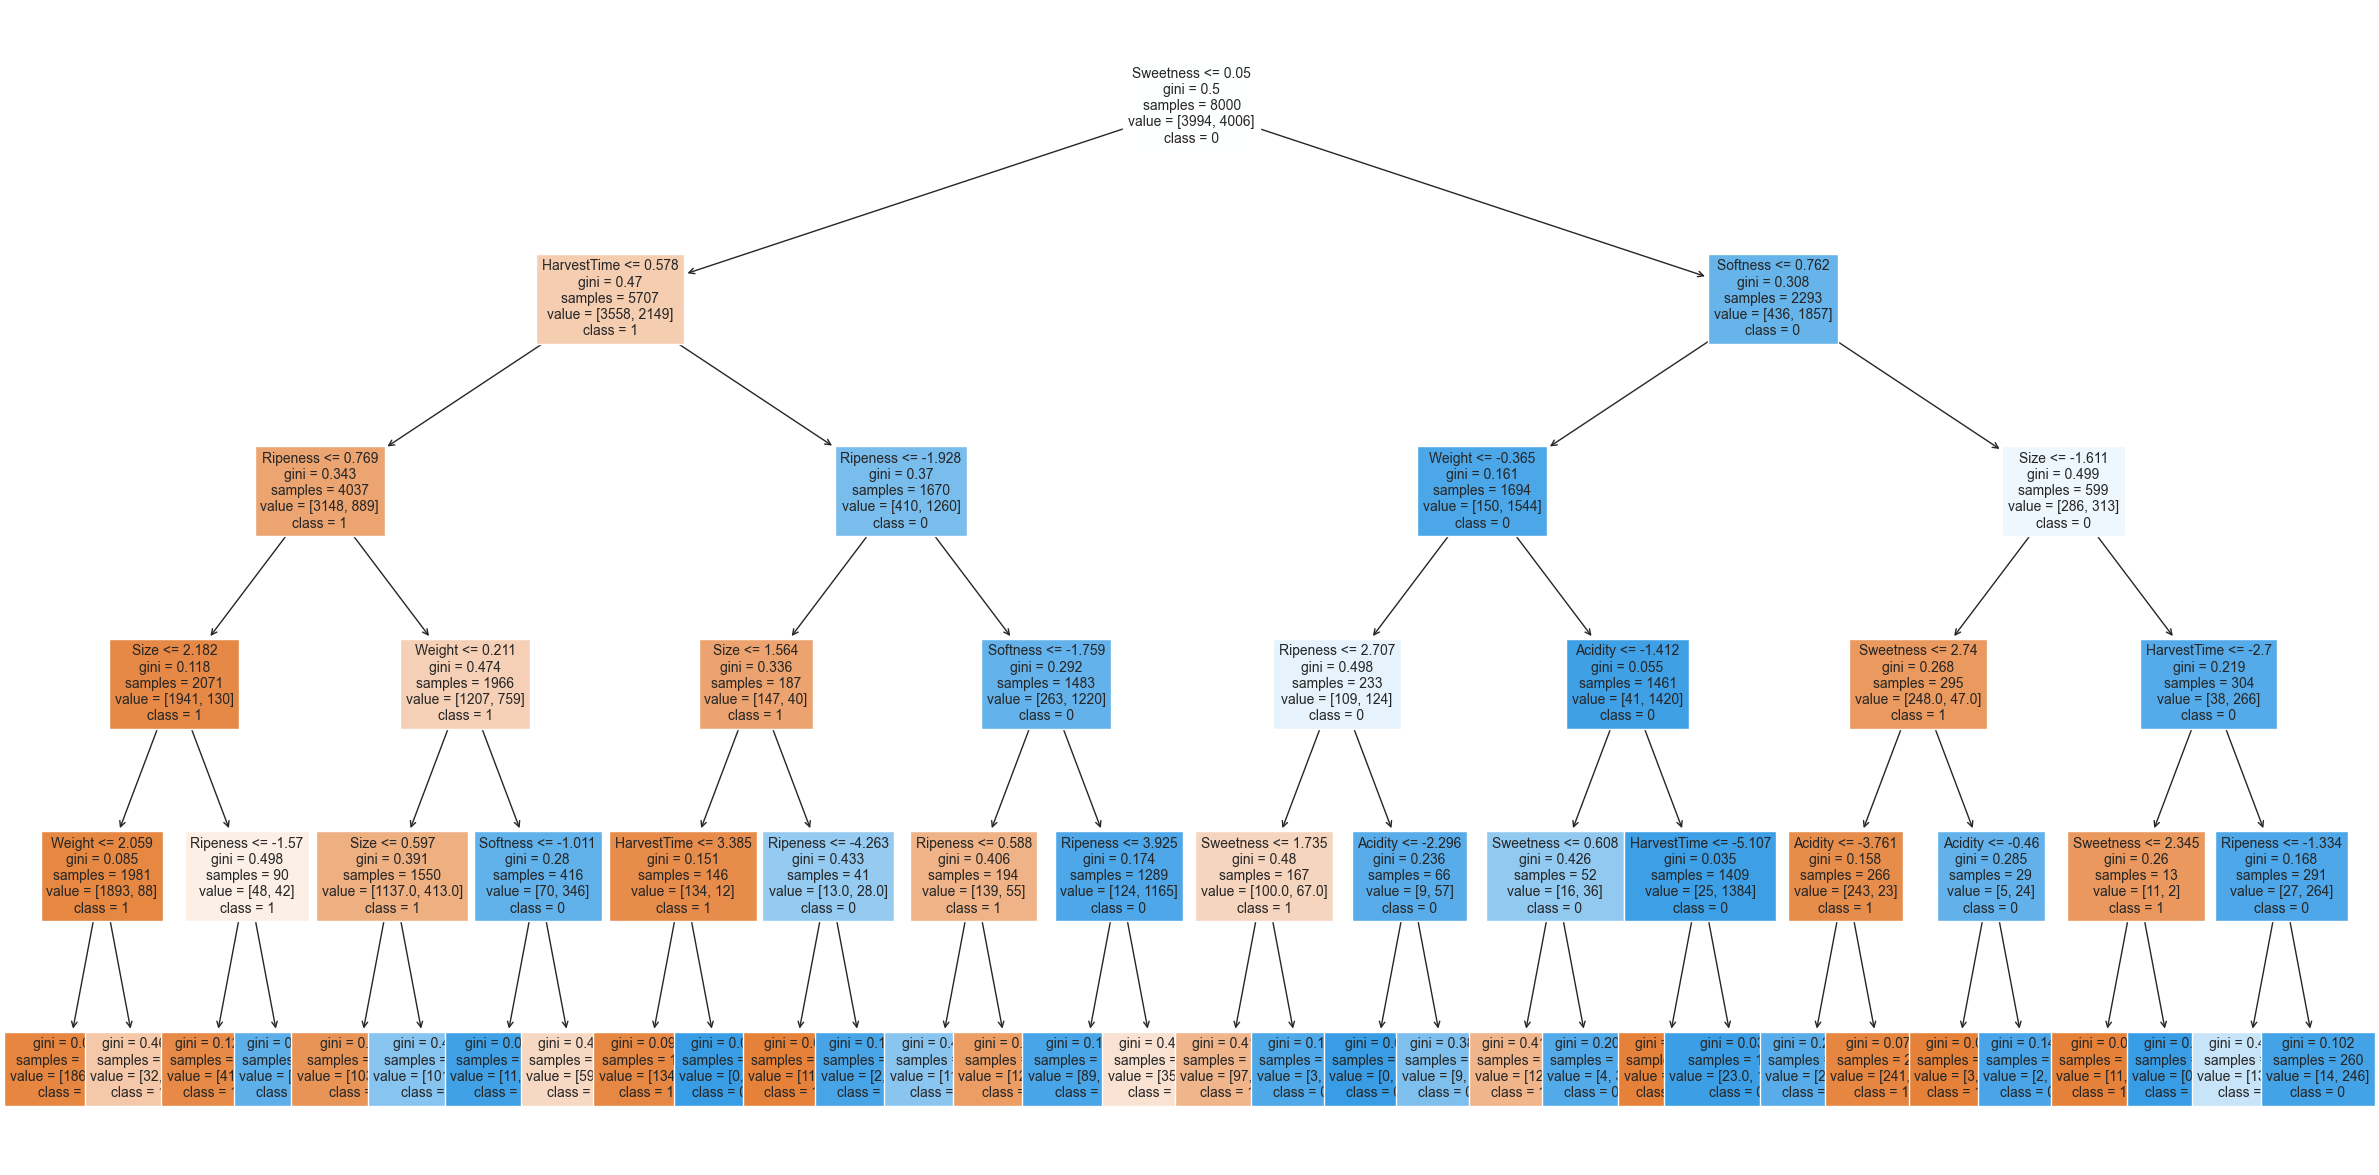

In [30]:
X = data.drop(columns=['Quality'])
y = data['Quality']


# Теперь X и y можно использовать для обучения модели
from sklearn.tree import DecisionTreeClassifier

# Создаем и обучаем классификатор дерева решений
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X, y)

# Визуализация дерева решений
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 15))
class_names = list(map(str, y.unique()))  # Преобразование уникальных значений y в строки
tree.plot_tree(clf, fontsize=10, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()


In [31]:
print('Логистическая регрессия')
print_metrics(y_test, y_pred_log)

print('\nМетод опорных векторов')
print_metrics(y_test, y_pred_svm)

print('\nДерево решений')
print_metrics(y_test, y_pred_tree)

Логистическая регрессия
Precision: 0.840625
F1-measure: 0.8691437802907916

Метод опорных векторов
Precision: 0.8806451612903226
F1-measure: 0.896551724137931

Дерево решений
Precision: 0.8548387096774194
F1-measure: 0.8702791461412152
